## Importing the relevant libraries

In [175]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Loading the raw data

In [176]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [177]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55,NaN
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Determining the variables of interest

In [178]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.00,4345,4345.00,4195.00,4345,4345,4345.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.75,NaN,161.24,2.79,NaN,NaN,2006.55
std,NaN,25584.24,NaN,105.71,5.07,NaN,NaN,6.72
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,86.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,155.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Dealing with missing values

In [179]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [180]:
data_no_mv = data.dropna(axis=0)

In [181]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Density'>

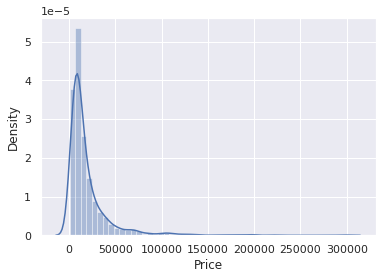

In [182]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [183]:
q = data_no_mv['Price'].quantile(0.95)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.00,3823,3823.00,3823.00,3823,3823,3823.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.80,NaN,171.10,2.72,NaN,NaN,2005.93
std,NaN,12198.37,NaN,99.27,5.05,NaN,NaN,6.57
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6800.00,NaN,100.00,1.80,NaN,NaN,2002.00
50%,NaN,10900.00,NaN,163.00,2.00,NaN,NaN,2007.00
75%,NaN,19150.00,NaN,234.00,3.00,NaN,NaN,2011.00


<AxesSubplot:xlabel='Price', ylabel='Density'>

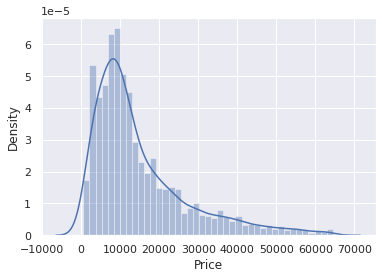

In [184]:
sns.distplot(data_1['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

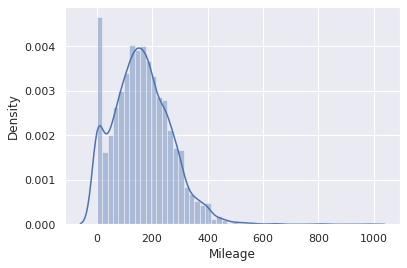

In [185]:
sns.distplot(data_no_mv['Mileage'])

In [186]:
q = data_1['Mileage'].quantile(0.98)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

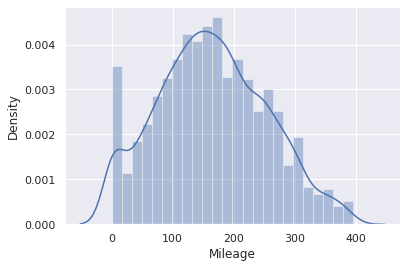

In [187]:
sns.distplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

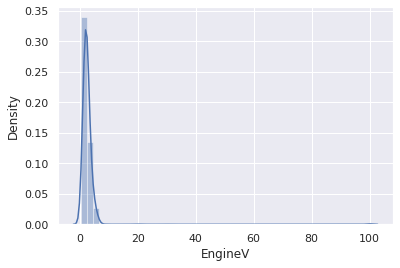

In [188]:
sns.distplot(data_no_mv['EngineV'])

In [189]:
data_3 = data_2[data_2['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

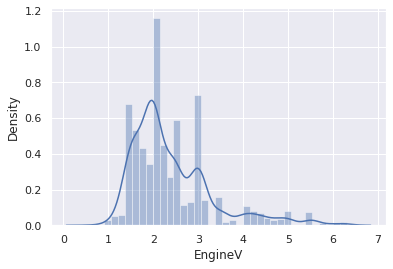

In [190]:
sns.distplot(data_3['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

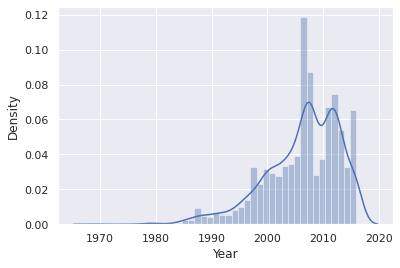

In [191]:
sns.distplot(data_no_mv['Year'])

In [192]:
q = data_3['Year'].quantile(0.02)
data_4 = data_3[data_3['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

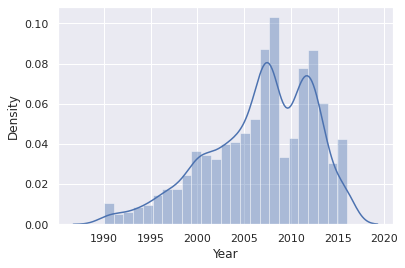

In [193]:
sns.distplot(data_4['Year'])

In [194]:
data_cleaned = data_4.reset_index(drop=True)

In [195]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3628,3628.00,3628,3628.00,3628.00,3628,3628,3628.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,823,NaN,1385,NaN,NaN,1664,3273,NaN
mean,NaN,15450.83,NaN,163.27,2.41,NaN,NaN,2006.67
std,NaN,12227.53,NaN,88.55,0.93,NaN,NaN,5.63
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1990.00
25%,NaN,7300.00,NaN,100.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,160.00,2.00,NaN,NaN,2007.00
75%,NaN,19999.00,NaN,225.00,3.00,NaN,NaN,2011.00


## Checking the OLS assumptions

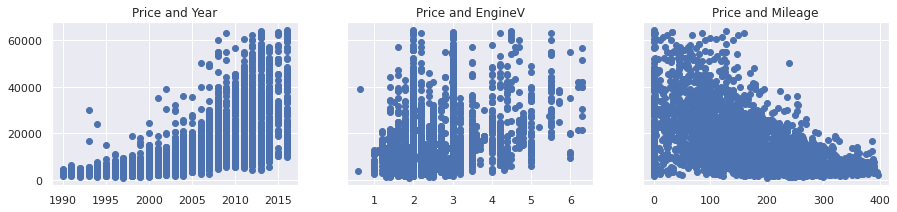

In [196]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

<AxesSubplot:xlabel='Price', ylabel='Density'>

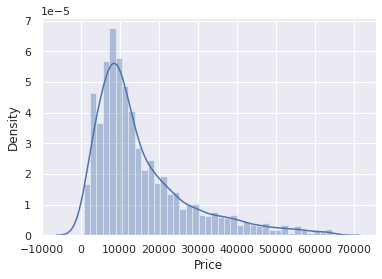

In [197]:
sns.distplot(data_cleaned['Price'])

### Relaxing the assumptions

In [198]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
2,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
3,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
4,Audi,14200.00,vagon,200,2.70,Diesel,yes,2006,9.56
...,...,...,...,...,...,...,...,...,...
3623,Renault,6800.00,sedan,152,1.60,Petrol,yes,2007,8.82
3624,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3625,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3626,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


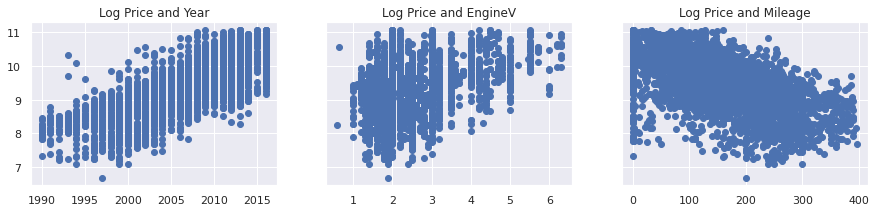

In [199]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [200]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [201]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [203]:
vif

,VIF,features
0,4.40,Mileage
1,10.41,Year
2,7.83,EngineV


In [204]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [205]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [206]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Rearrange a bit

In [207]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [208]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [209]:
data_preprocessed = data_with_dummies
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
2,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
4,200,2.70,9.56,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Linear regression model

### Declare the inputs and the targets

In [210]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [211]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [212]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [213]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [214]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [215]:
y_hat = reg.predict(x_train)

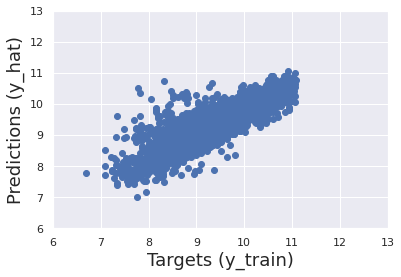

In [216]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

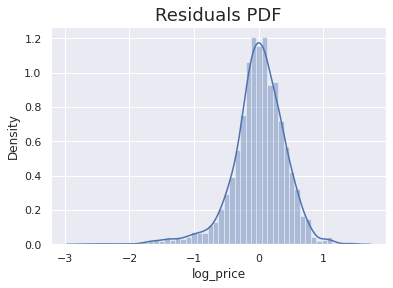

In [217]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [218]:
reg.score(x_train,y_train)

0.713402659537913

### Finding the weights and bias

In [219]:
reg.intercept_

9.350403003076448

In [220]:
reg.coef_

array([-0.37869347,  0.1770176 ,  0.01233952, -0.00162509, -0.12989517,
       -0.17545638, -0.04607913, -0.08278645, -0.15624755, -0.09176892,
       -0.19493844, -0.12473554, -0.16639801, -0.11048811, -0.02028643,
       -0.13531958,  0.32817334])

## Testing

In [221]:
y_hat_test = reg.predict(x_test)

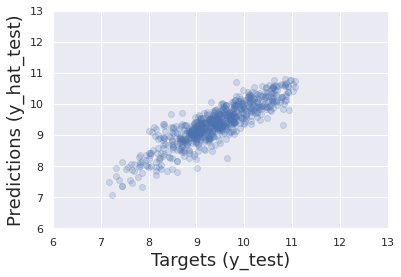

In [222]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [223]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

In [224]:
y_test = y_test.reset_index(drop=True)


In [225]:
df_pf['Target'] = np.exp(y_test)


In [226]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [227]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [228]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,726.00,726.00,726.00,726.00
mean,13978.77,15687.24,1708.47,28.64
std,8889.69,12267.02,6579.04,27.72
min,1173.65,1300.00,-25942.86,0.00
25%,8026.51,7700.00,-1895.24,11.12
50%,11694.03,11800.00,246.05,22.55
75%,17837.84,19500.00,3448.54,37.52
max,49186.37,64000.00,39001.39,232.32
